In [83]:
import pandas as pd
from sdv.single_table import TVAESynthesizer, CTGANSynthesizer, GaussianCopulaSynthesizer
from sdv.metadata import Metadata
from sdv.datasets.local import load_csvs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
def create_foot_heatmap(data_row, label):
    if len(data_row) != 210:
        raise ValueError("Data row must contain exactly 210 values (105 per foot).")

    # Split into left and right foot
    left_foot = np.array(data_row[:105]).reshape((15, 7))
    right_foot = np.array(data_row[105:]).reshape((15, 7))

    # Combine side-by-side with spacing in between (e.g. a column of NaNs)
    gap = np.full((15, 2), np.nan)
    combined = np.hstack((left_foot, gap, right_foot))

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(combined, cmap="coolwarm", linewidths=0.0, linecolor='black', square=True,
                cbar_kws={'label': 'Pressure'}, xticklabels=False, yticklabels=False)

    plt.title(f"Foot Pressure Heatmap (Left | Right) label: {label}")
    plt.show()

In [85]:
number_new_rows = 10

In [ ]:
datasets = load_csvs(
    folder_name='/Users/hwoutersen/Desktop/School/Jaar3/sem6/MeasureModel/data',
    read_csv_parameters={
        'skipinitialspace': True,
        'sep': ',',})

data = datasets['processed_output_combined']

/Users/hwoutersen/opt/anaconda3/envs/sem6/lib/python3.10/site-packages/sdv/datasets/local.py:36: UserWarning: Ignoring incompatible files ['data_converter.py', 'measuredata.xlsx', 'data_extender.ipynb', 'data_generator.py', 'data_converter2.py'] in folder '/Users/hwoutersen/Desktop/School/Jaar3/sem6/MeasureModel/data'.
  warnings.warn(f"Ignoring incompatible files {other_files} in folder '{folder_name}'.")


In [ ]:
data.shape

In [ ]:
metadata = Metadata.detect_from_dataframe(
    data=data,
    table_name='measuremate_data')

In [ ]:
synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(data)

synthetic_ctgan = synthesizer.sample(num_rows=number_new_rows)
synthetic_ctgan.shape

In [ ]:
synthesizer = TVAESynthesizer(metadata)
synthesizer.fit(data)

synthetic_tvae = synthesizer.sample(num_rows=number_new_rows)
synthetic_ctgan.shape

In [ ]:
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data)

synthetic_gaussian = synthesizer.sample(num_rows=number_new_rows)
synthetic_gaussian.shape

In [ ]:
synthesizer = DayZSynthesizer(metadata)
synthesizer.fit(data)

synthetic_dayZ = synthesizer.sample(num_rows=number_new_rows)
synthetic_dayZ.shape

In [ ]:
i = 1

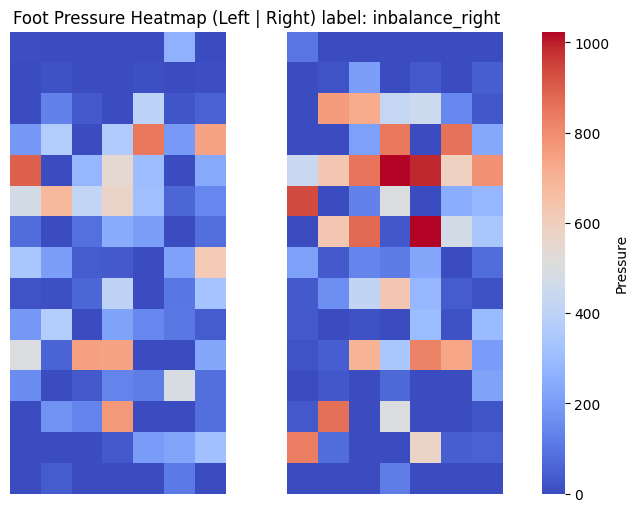

In [90]:
observation, label = synthetic_ctgan.iloc[i].values[1:-1], synthetic_ctgan.iloc[i].values[-1]
create_foot_heatmap(list(observation), label)

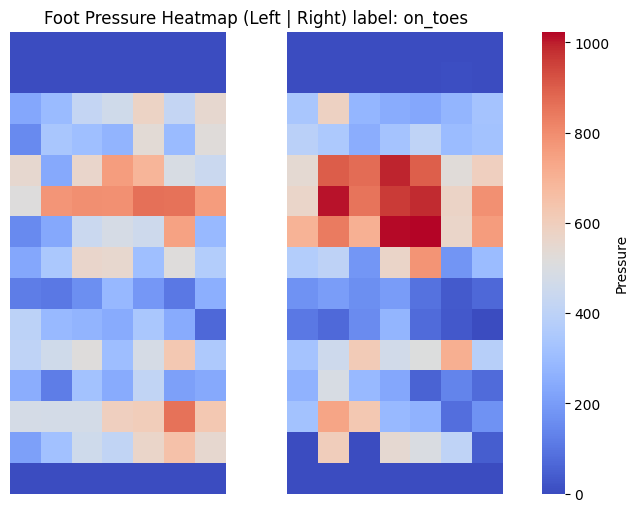

In [91]:
observation, label = synthetic_tvae.iloc[i].values[1:-1], synthetic_tvae.iloc[i].values[-1]
create_foot_heatmap(list(observation), label)

In [ ]:
observation, label = synthetic_gaussian.iloc[i].values[1:-1], synthetic_gaussian.iloc[i].values[-1]
create_foot_heatmap(list(observation), label)

In [ ]:
observation, label = synthetic_dayZ.iloc[i].values[1:-1], synthetic_dayZ.iloc[i].values[-1]
create_foot_heatmap(list(observation), label)

In [ ]:
# synthetic_ctgan.to_csv("synthetisch_ctgan.csv", index=False)
# synthetic_tvae.to_csv("synthetisch_tvae.csv", index=False)

In [ ]:
df1 = pd.read_csv("synthetisch_ctgan.csv")

combined = pd.